## Project I - Titanic: Machine Learning from Disaster

### Wczytanie danych:

In [2]:
import pandas as pd

In [3]:
train = pd.read_csv('C:/Users/Ada/Desktop/Learning Group/2018_10_30/Titanic/all/train.csv')

In [4]:
test = pd.read_csv('C:/Users/Ada/Desktop/Learning Group/2018_10_30/Titanic/all/test.csv')

In [5]:
final = pd.read_csv('C:/Users/Ada/Desktop/Learning Group/2018_10_30/Titanic/all/gender_submission.csv')

### Trochę teorii...

#### Czemu mamy do dyspozycji 2 zbiory?
#### Zbiór uczący (train set) - służy do oszacowania konkurujących modeli, ich parametrów
#### Zbiór walidacyjny (validation set) - służy do wyboru jednego z oszacowanych klasyfikatorów - tego, który ma najmniejszy błąd na zbiorze walidacyjnym
#### Zbiór testowy (test set) - służy do nieobciążonej oceny błędu

In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test.head(n=4)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


In [10]:
final.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


#### UWAGA! W Python numeracja zaczyna się od 0!

### Zmienne:
#### -- PassengerId - type should be integers
#### -- Survived - Survived or Not
#### -- Pclass - Class of Travel
#### -- Name - Name of Passenger
#### -- Sex- Gender
#### -- Age
#### -- SibSp - Number of Sibling/Spouse aboard
#### -- Parch - Number of Parent/Child aboard
#### -- Ticket
#### -- Fare
#### -- Cabin
#### -- Embarked - The port in which a passenger has embarked. C - Cherbourg, S - Southampton, Q = Queenstown

### Klasyfikacja zmiennych w zbiorze:
#### Zmienna celu (objaśniana) vs zmienne objaśniające
#### Zmienne ciągłe vs zmienne klasyfikujące (kategoryzujące) (w tym binarne, nominalne, porządkowe)

### Problem klasyfikacyjny vs problem regresyjny

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [13]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
train.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


### EDA - Exploratory Data Analysis

In [24]:
import seaborn as sns
%matplotlib inline

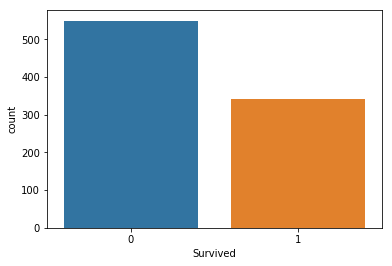

In [25]:
sns.countplot(x='Survived', data=train)

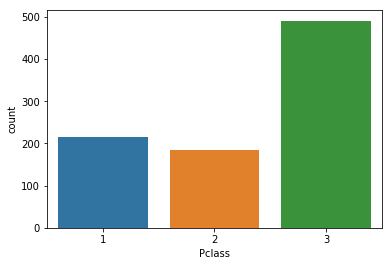

In [27]:
sns.countplot(x='Pclass', data=train)

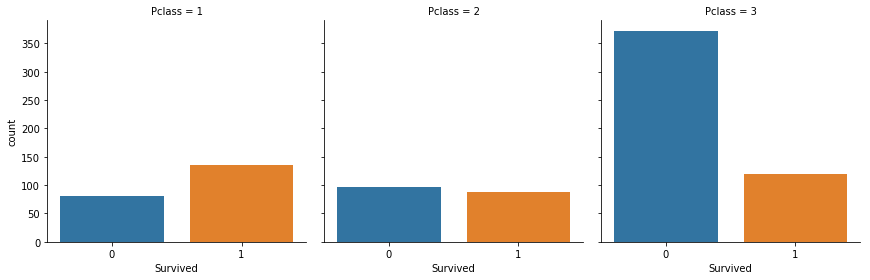

In [31]:
sns.factorplot(x='Survived', col='Pclass', kind='count', data=train)

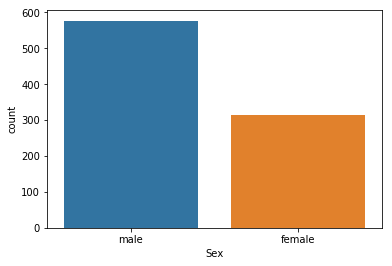

In [29]:
sns.countplot(x='Sex', data=train)

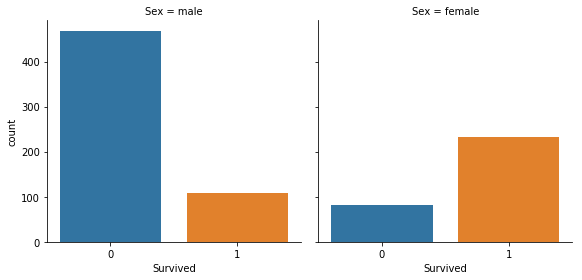

In [32]:
sns.factorplot(x='Survived', col='Sex', kind='count', data=train)

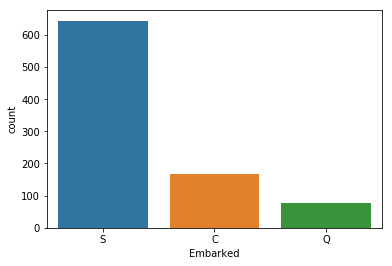

In [30]:
sns.countplot(x='Embarked', data=train)

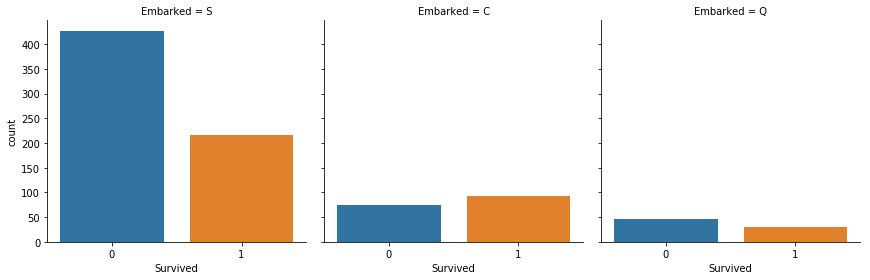

In [33]:
sns.factorplot(x='Survived', col='Embarked', kind='count', data=train)

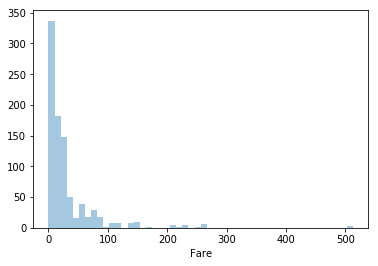

In [35]:
sns.distplot(train.Fare, kde=False)

Survived
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: Fare, dtype: object

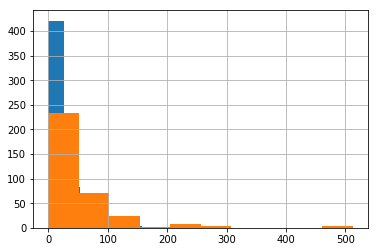

In [36]:
train.groupby('Survived').Fare.hist()

In [15]:
train.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550
